# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Read dataset

In [2]:
#Read Data
df=pd.read_csv(r'C:\Users\ZhengHoom\Downloads\emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


# Check duplicate data

In [3]:
#Check duplicate data
df.duplicated().sum()

33

# Remove duplicate data

In [4]:
#Remove duplicate data
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.duplicated().sum()

0

# Check null value in dataset

In [6]:
#Check null value
df.isna().sum()

text    0
spam    0
dtype: int64

# EDA

## Barchart

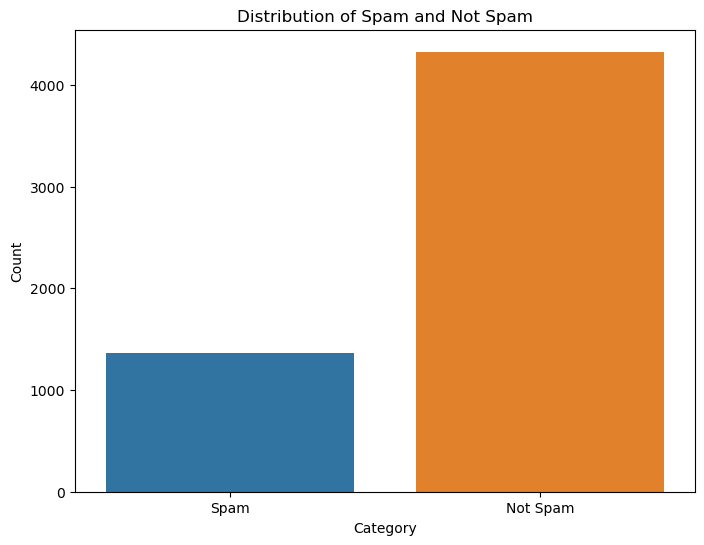

In [7]:
#Barchart 
plt.figure(figsize=(8,6))
df['spam'] = df['spam'].map({0: 'Not Spam', 1:'Spam'})
sns.countplot(x='spam', data=df)
plt.title('Distribution of Spam and Not Spam')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Wordcloud

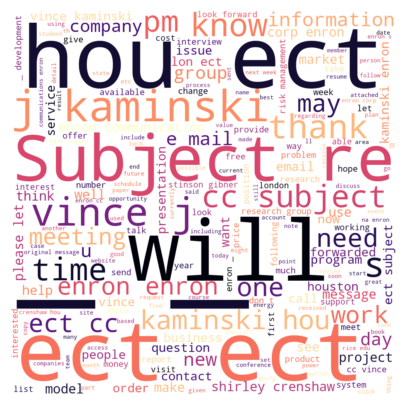

In [8]:
#Wordcloud
all_text = ' '.join(df['text'])
wc_text = WordCloud(width = 1000,
                    height = 1000,
                   stopwords = STOPWORDS,
                   background_color = 'white',
                   colormap = 'magma',
                   random_state=42).generate(all_text)

plt.figure(figsize = (9,5))
plt.imshow(wc_text, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
#Assign Data
X = df['text'].astype(str)
y = df['spam'].replace({0:"Not Spam", 1:"Spam"}).astype("object")

# Logistic Regression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
#Vectorize text data for logistic Regression
vect = TfidfVectorizer()
X_train_v = vect.fit_transform(X_train)
X_test_v = vect.transform(X_test)
X_visualization = X_train_v

In [12]:
#Vectorized data in array view
X_array = X_train_v.toarray()
X_array

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.064795, 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

In [13]:
model = LogisticRegression()
model.fit(X_train_v,y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test_v)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

## Classification report of LR

In [16]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {conf_matrix}")
print(f"Classification Report: {classification_rep}")

Accuracy: 0.9789288849868305
Confusion Matrix: [[842   1]
 [ 23 273]]
Classification Report:               precision    recall  f1-score   support

    Not Spam       0.97      1.00      0.99       843
        Spam       1.00      0.92      0.96       296

    accuracy                           0.98      1139
   macro avg       0.98      0.96      0.97      1139
weighted avg       0.98      0.98      0.98      1139



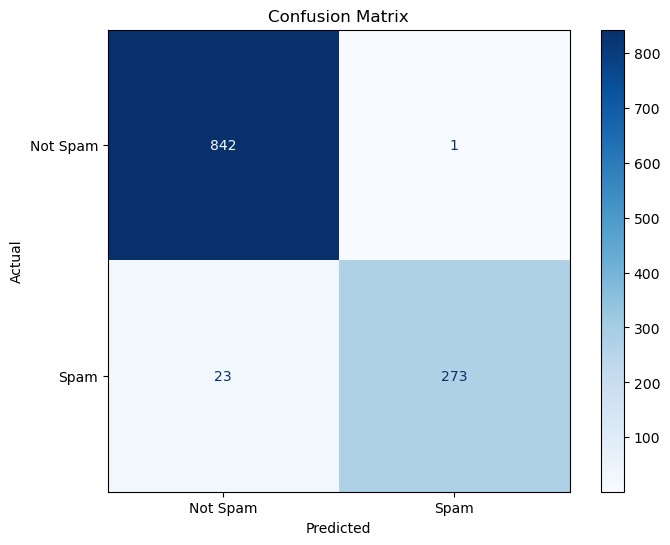

In [17]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Spam', 'Spam'])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(cmap="Blues", ax=ax)

# Show the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Input testing

In [18]:
test = ['Hi my name is Sarah and I am sending this email to you.']
test_1 = vect.transform(test)
test_1_predict = model.predict(test_1)
test_1_predict

array(['Not Spam'], dtype=object)

In [19]:
test2 = ['Congratulation! You have won a computer from XFTXX website! Click the email to receive']
test_2 = vect.transform(test2)
test_2_predict = model.predict(test_2)
test_2_predict

array(['Spam'], dtype=object)

# Decision Tree

In [20]:
scaler = StandardScaler(with_mean = False)
X_visualization = scaler.fit_transform(X_visualization)

In [21]:
dt_model = DecisionTreeClassifier(criterion='entropy', splitter='best')

In [22]:
dt_model.fit(X_train_v, y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
prediction = dt_model.predict(X_test_v)

In [24]:
accuracy = accuracy_score(prediction,y_test)
print(accuracy)

0.9578577699736611


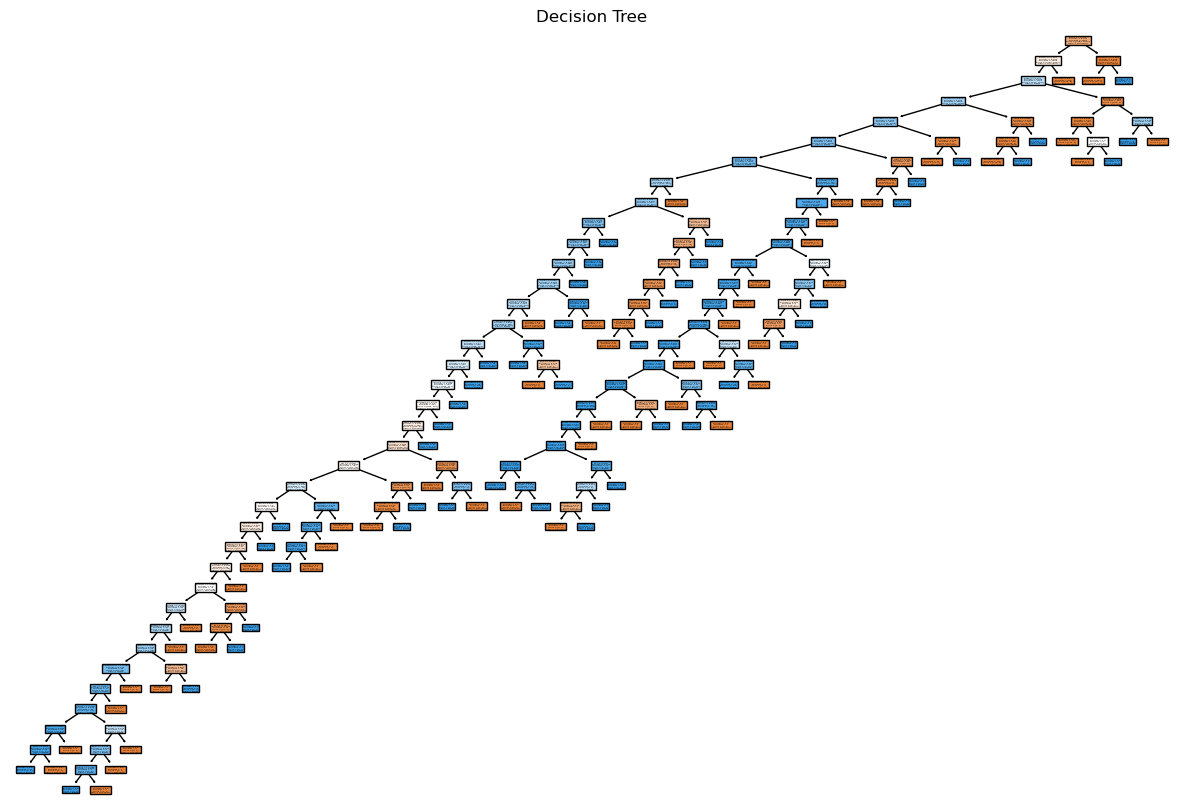

In [25]:
plt.figure(figsize=(15,10))
plot_tree(dt_model, filled=True, feature_names=vect.get_feature_names_out(), class_names=['Not Spam', 'Spam'])
plt.title('Decision Tree')
plt.show()

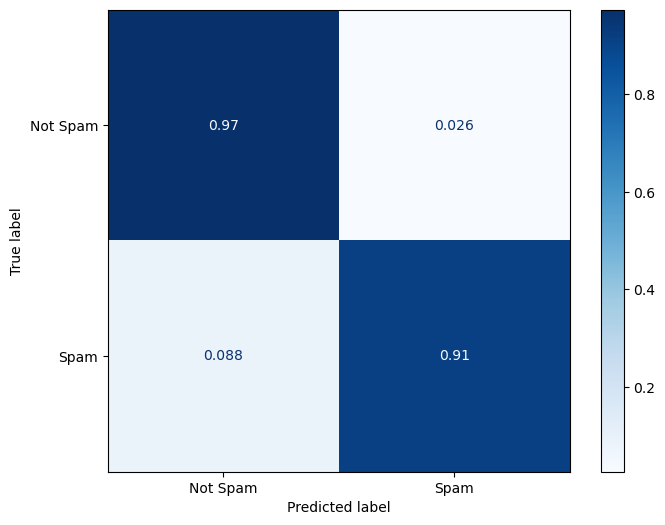

In [26]:
cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
fig, ax = plt.subplots(figsize=(8,6))
cm_display.plot(ax=ax,cmap='Blues')
plt.show()

In [27]:
print(classification_report(y_test,prediction.reshape(-1,1), target_names=['Not Spam', 'Spam']))

              precision    recall  f1-score   support

    Not Spam       0.97      0.97      0.97       843
        Spam       0.92      0.91      0.92       296

    accuracy                           0.96      1139
   macro avg       0.95      0.94      0.94      1139
weighted avg       0.96      0.96      0.96      1139

